In [60]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

fig_dpi = 200

# Rotations

80/10/10 Split, 30 epochs

Expansion Factor: 2

## Index
0. degrees
1. top-1 accuracy
2. top-5 accuracy
3. last val loss
4. last val accuracy

In [61]:
standard_res = [20.88, 48.24, 3.34, 25.25]

flipped_res = [44.84, 72.45, 2.84, 49.02]
flipped_batch256_res = [31.5, 60.59, 3.44, 36.33]

# default batch size (128)
rot_results = np.array([
    [1, 44.6, 71.34, 2.84, 48.71],
    [5, 46.45, 73.5, 2.85, 47.61],
    [10, 45.71, 72.64, 2.93, 45.89],
    [20, 42.12, 70.41, 2.95, 40.99],
    [30, 28.17, 56.52, 3.44, 30.58],
    [40, 25.08, 51.33, 3.46, 28.37]
])

rot_batch256_results = np.array([
    [1, 34.22, 62.08, 3.45, 38.23],
    [5, 32.43, 60.90, 3.35, 34.77],
    [10, 30.27, 58.62, 3.47, 30.86],
    [20, 26.87, 53.80, 3.36, 28.96],
    [30, 18.47, 41.2, 3.79, 21.82],
    [40, 15.19, 37.37, 3.87, 18.19],
])

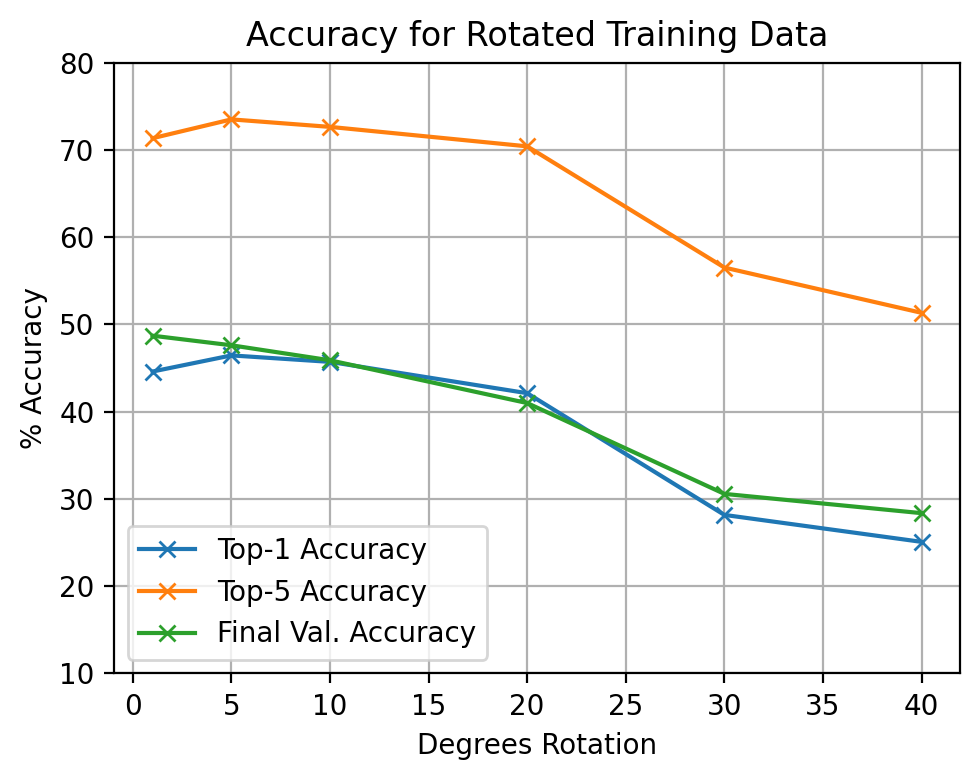

In [62]:
fig = plt.figure(figsize=(5, 4))
fig.set_dpi(fig_dpi)

plt.plot(rot_results[:, 0], rot_results[:, 1], 'x-', label="Top-1 Accuracy")
plt.plot(rot_results[:, 0], rot_results[:, 2], 'x-', label="Top-5 Accuracy")
plt.plot(rot_results[:, 0], rot_results[:, 4], 'x-', label="Final Val. Accuracy")

plt.ylim(10, 80)

plt.title('Accuracy for Rotated Training Data')
plt.ylabel('% Accuracy')
plt.xlabel('Degrees Rotation')

plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig('rot-accuracy.png')

plt.show()

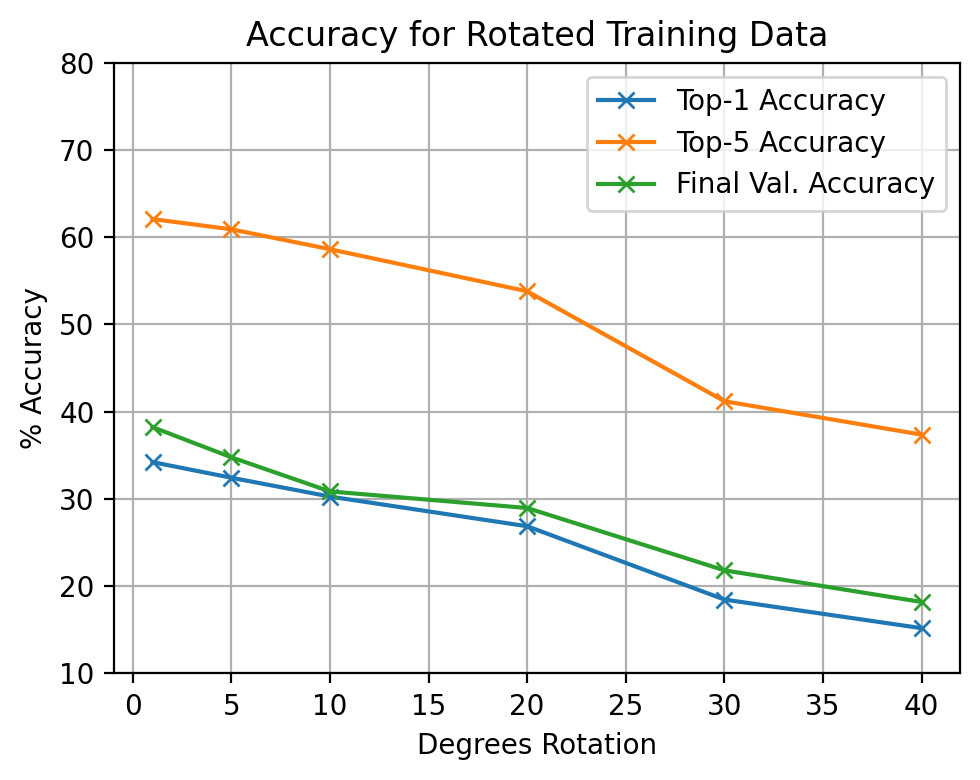

In [63]:
fig = plt.figure(figsize=(5, 4))
fig.set_dpi(fig_dpi)

plt.plot(rot_batch256_results[:, 0], rot_batch256_results[:, 1], 'x-', label="Top-1 Accuracy")
plt.plot(rot_batch256_results[:, 0], rot_batch256_results[:, 2], 'x-', label="Top-5 Accuracy")
plt.plot(rot_batch256_results[:, 0], rot_batch256_results[:, 4], 'x-', label="Final Val. Accuracy")

plt.ylim(10, 80)

plt.title('Accuracy for Rotated Training Data')
plt.ylabel('% Accuracy')
plt.xlabel('Degrees Rotation')

plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig('rot-accuracy-256batch.png')

plt.show()

# All

Flip, rotate both ways, flip both rotations

Expansion Factor: 6

## Index
0. degrees
1. top-1 accuracy
2. top-5 accuracy
3. last val loss
4. last val accuracy

In [64]:
all_results = np.array([
    [5, 53.24, 79.49, 2.69, 55.64]
])

all_results_ba = np.array([
    [5, 26.37, 48.05, 5.07, 27.39]
])

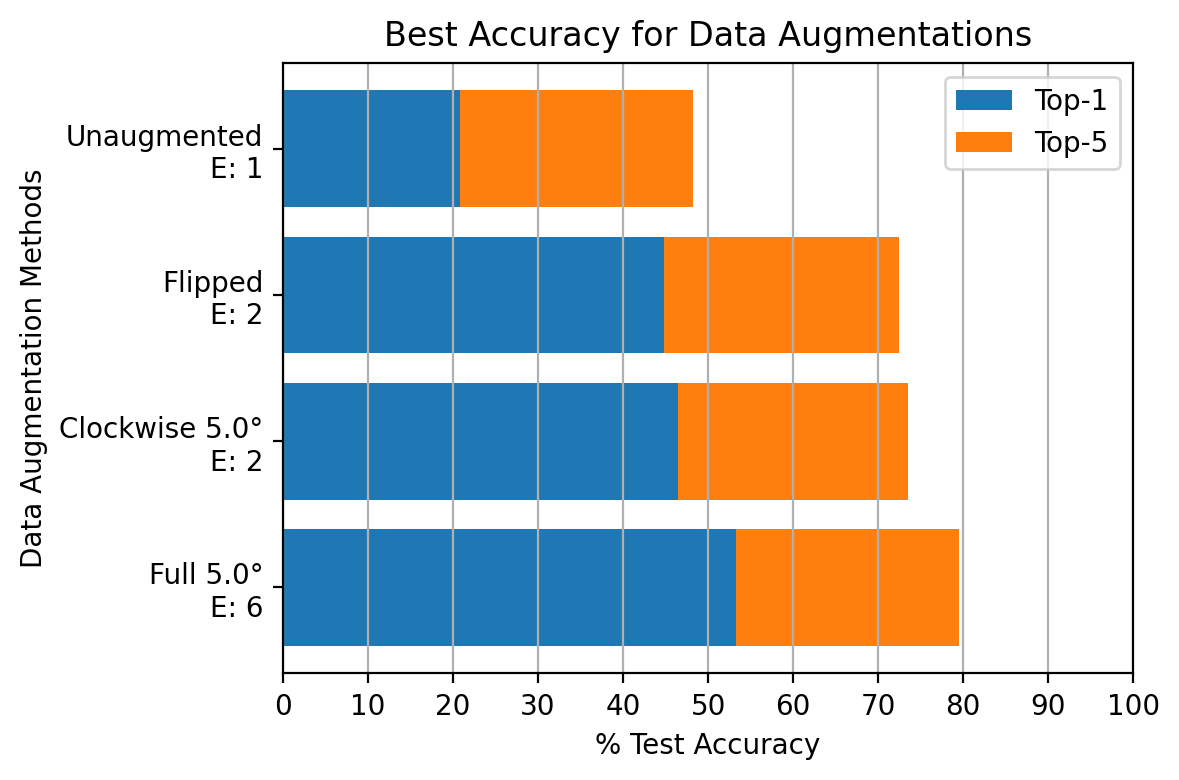

In [71]:
best_results = [standard_res, flipped_res]
best_labels = ['Unaugmented\nE: 1', 'Flipped\nE: 2']

# Clockwise Rotation
b_clock = rot_results[np.argmax(rot_results[:, 1])]
best_results.append(b_clock[1:])
best_labels.append(f'Clockwise {b_clock[0]}°\nE: 2')

best_results.append(all_results[0, 1:])
best_labels.append(f'Full {all_results[0, 0]}°\nE: 6')

best_results = best_results[::-1]
best_labels = best_labels[::-1]

fig = plt.figure(figsize=(6, 4))
fig.set_dpi(fig_dpi)

plt.barh(range(len(best_labels)), [i[0] for i in best_results], tick_label=best_labels, label='Top-1')
plt.barh(range(len(best_labels)), [i[1] - i[0] for i in best_results], tick_label=best_labels, label='Top-5', left=[i[0] for i in best_results])

plt.legend()
plt.grid(axis='x')
plt.title('Best Accuracy for Data Augmentations')
plt.xlabel('% Test Accuracy')
plt.ylabel('Data Augmentation Methods')

plt.xlim(0, 100)
plt.xticks(np.linspace(0, 100, 11))

plt.tight_layout()
plt.savefig('best-barh.png')

plt.show()

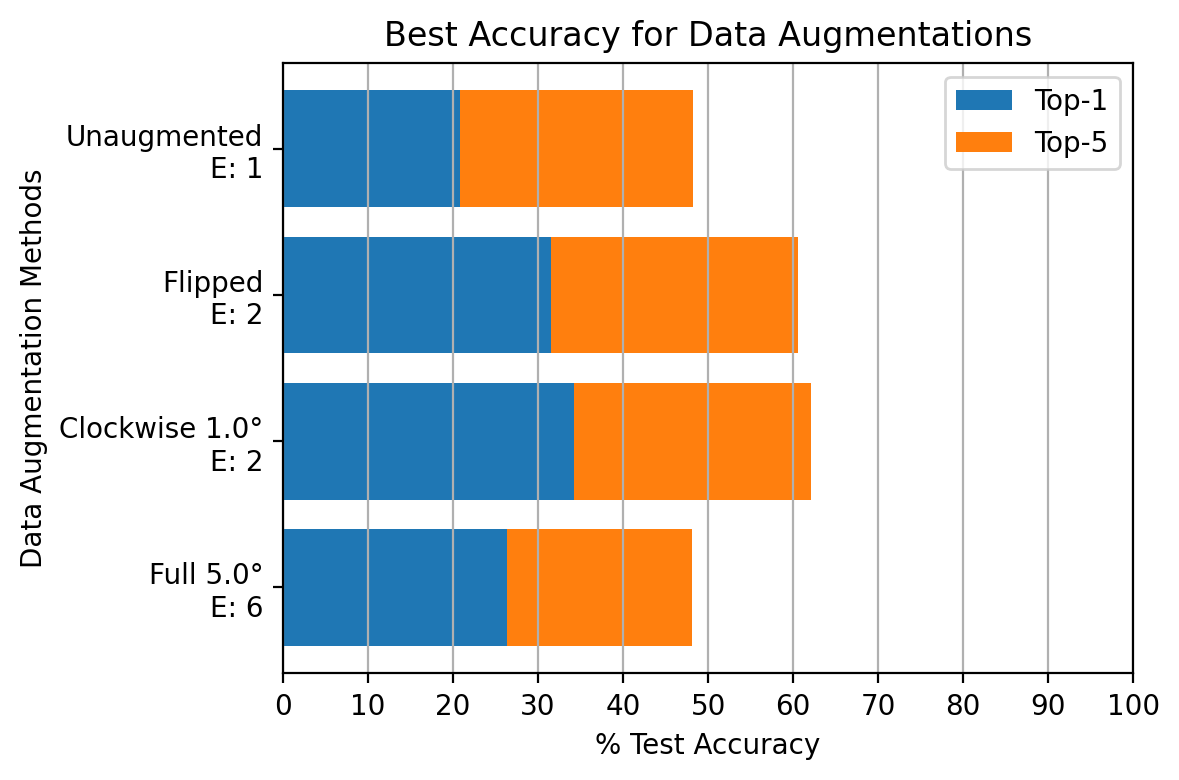

In [72]:
best_results_256 = [standard_res, flipped_batch256_res]
best_labels_256 = ['Unaugmented\nE: 1', 'Flipped\nE: 2']

# Clockwise Rotation
b_clock_256 = rot_batch256_results[np.argmax(rot_batch256_results[:, 1])]
best_results_256.append(b_clock_256[1:])
best_labels_256.append(f'Clockwise {b_clock_256[0]}°\nE: 2')

best_results_256.append(all_results_ba[0, 1:])
best_labels_256.append(f'Full {all_results_ba[0, 0]}°\nE: 6')

best_results_256 = best_results_256[::-1]
best_labels_256 = best_labels_256[::-1]

fig = plt.figure(figsize=(6, 4))
fig.set_dpi(fig_dpi)

plt.barh(range(len(best_labels_256)), [i[0] for i in best_results_256], tick_label=best_labels_256, label='Top-1')
plt.barh(range(len(best_labels_256)), [i[1] - i[0] for i in best_results_256], tick_label=best_labels_256, label='Top-5', left=[i[0] for i in best_results_256])

plt.legend()
plt.grid(axis='x')
plt.title('Best Accuracy for Data Augmentations')
plt.xlabel('% Test Accuracy')
plt.ylabel('Data Augmentation Methods')

plt.xlim(0, 100)
plt.xticks(np.linspace(0, 100, 11))

plt.tight_layout()
plt.savefig('best-barh-256batch.png')

plt.show()